## Import Libraries

In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Import Dataset

In [2]:
customerapp = pd.read_csv('appdata10.csv')

## Exploratory Data Analysis

In [3]:
customerapp.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
customerapp['hour'] =customerapp.hour.str.slice(1,3).astype(int)

In [5]:
customerapp.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


Drop some less important features

In [6]:
customerappn= customerapp.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled']) #Note this is a copy of the original data frame

In [7]:
customerappn.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


### Histogram plotting

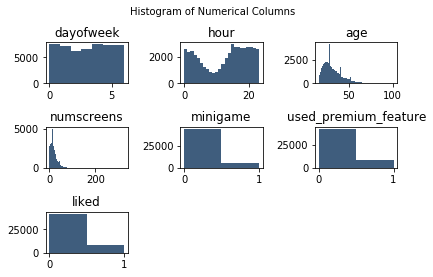

In [8]:
plt.suptitle('Histogram of Numerical Columns', fontsize=10)
for i in range(1, customerappn.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(customerappn.columns.values[i - 1])
    vals = np.size(customerappn.iloc[:, i - 1].unique())
    plt.hist(customerappn.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    

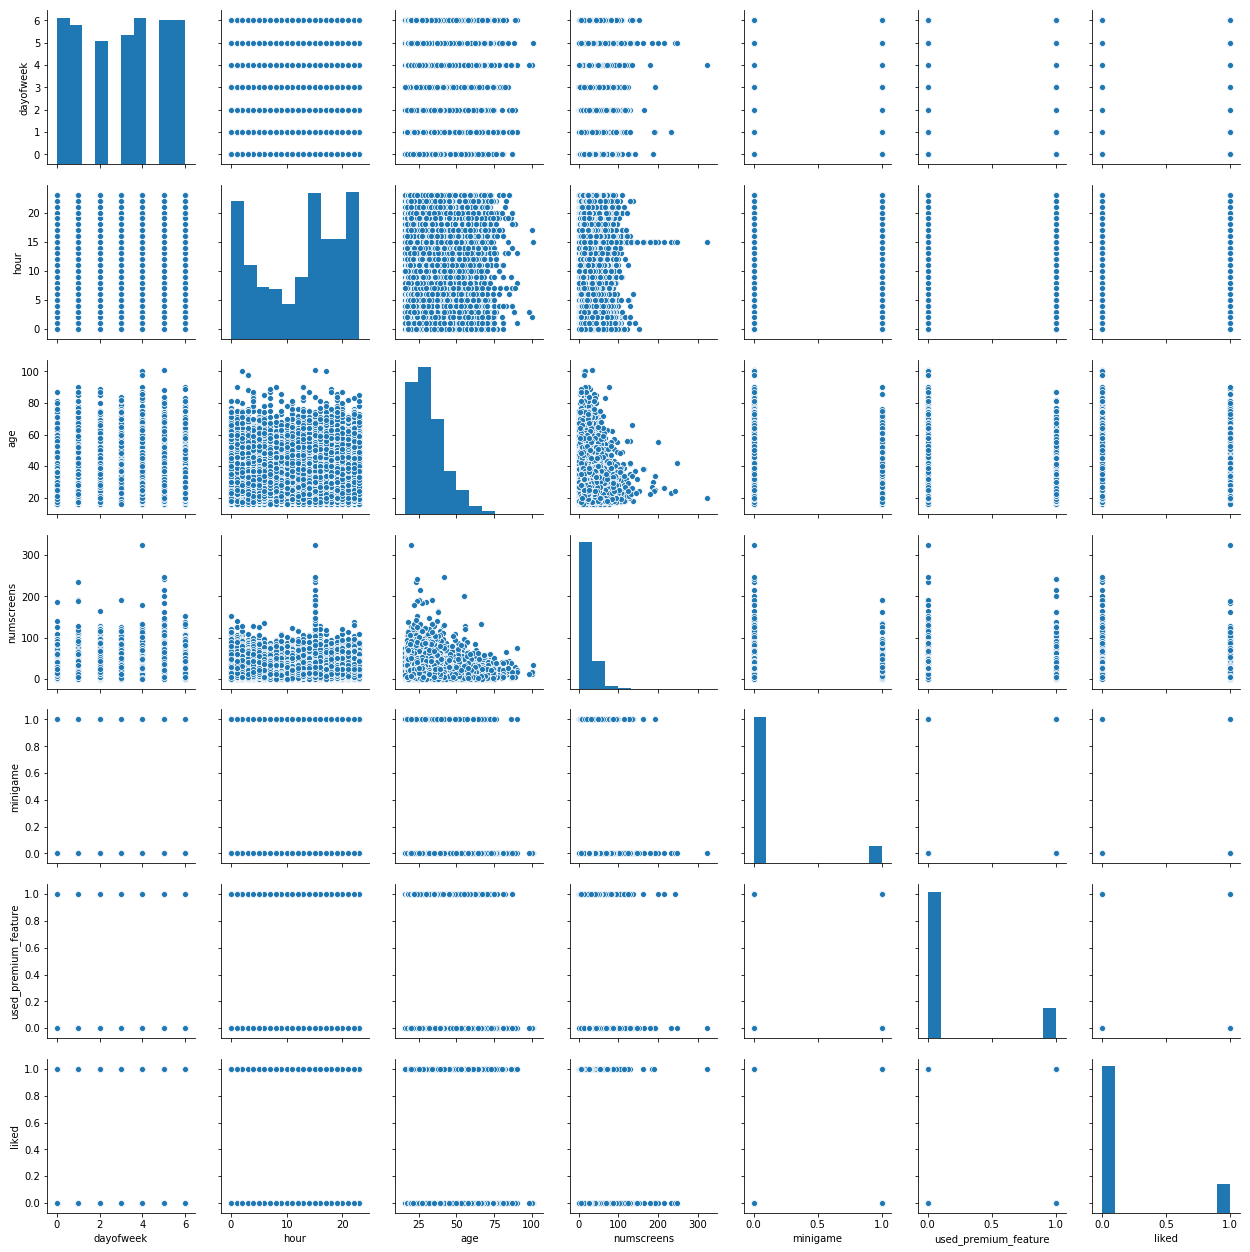

In [9]:
sns.pairplot(customerappn, palette = 'coolwarm')

### Correlation 

Correlation with Response Variable

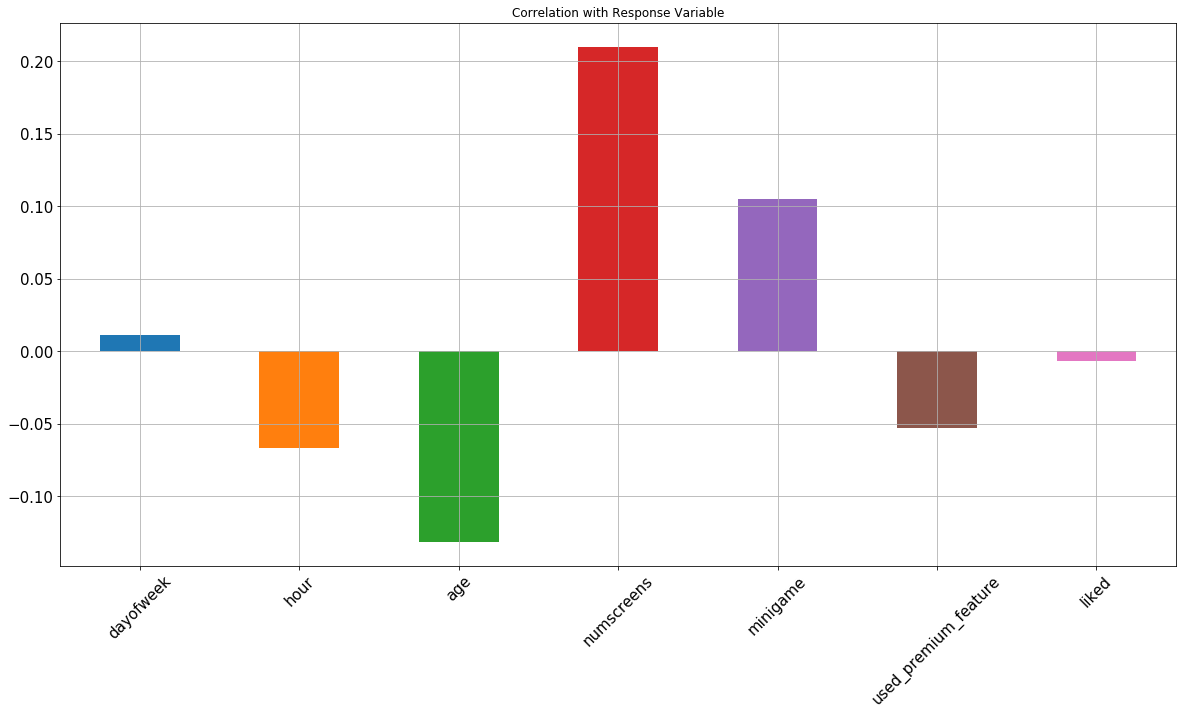

In [10]:
customerappn.corrwith(customerapp.enrolled).plot.bar(figsize=(20,10),
                                                   title = 'Correlation with Response Variable',
                                                   fontsize = 15, rot = 45,
                                                   grid = True)

Matrix Plot

In [11]:
ca = customerappn.corr()

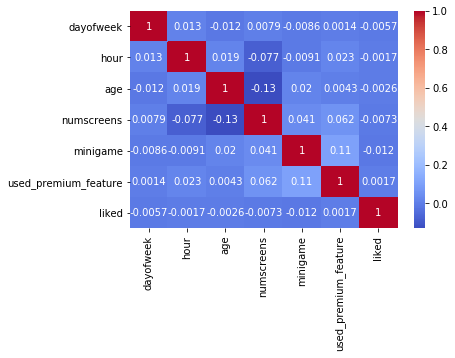

In [12]:
sns.heatmap(ca, annot = True, cmap= 'coolwarm')

Matrix Plot2

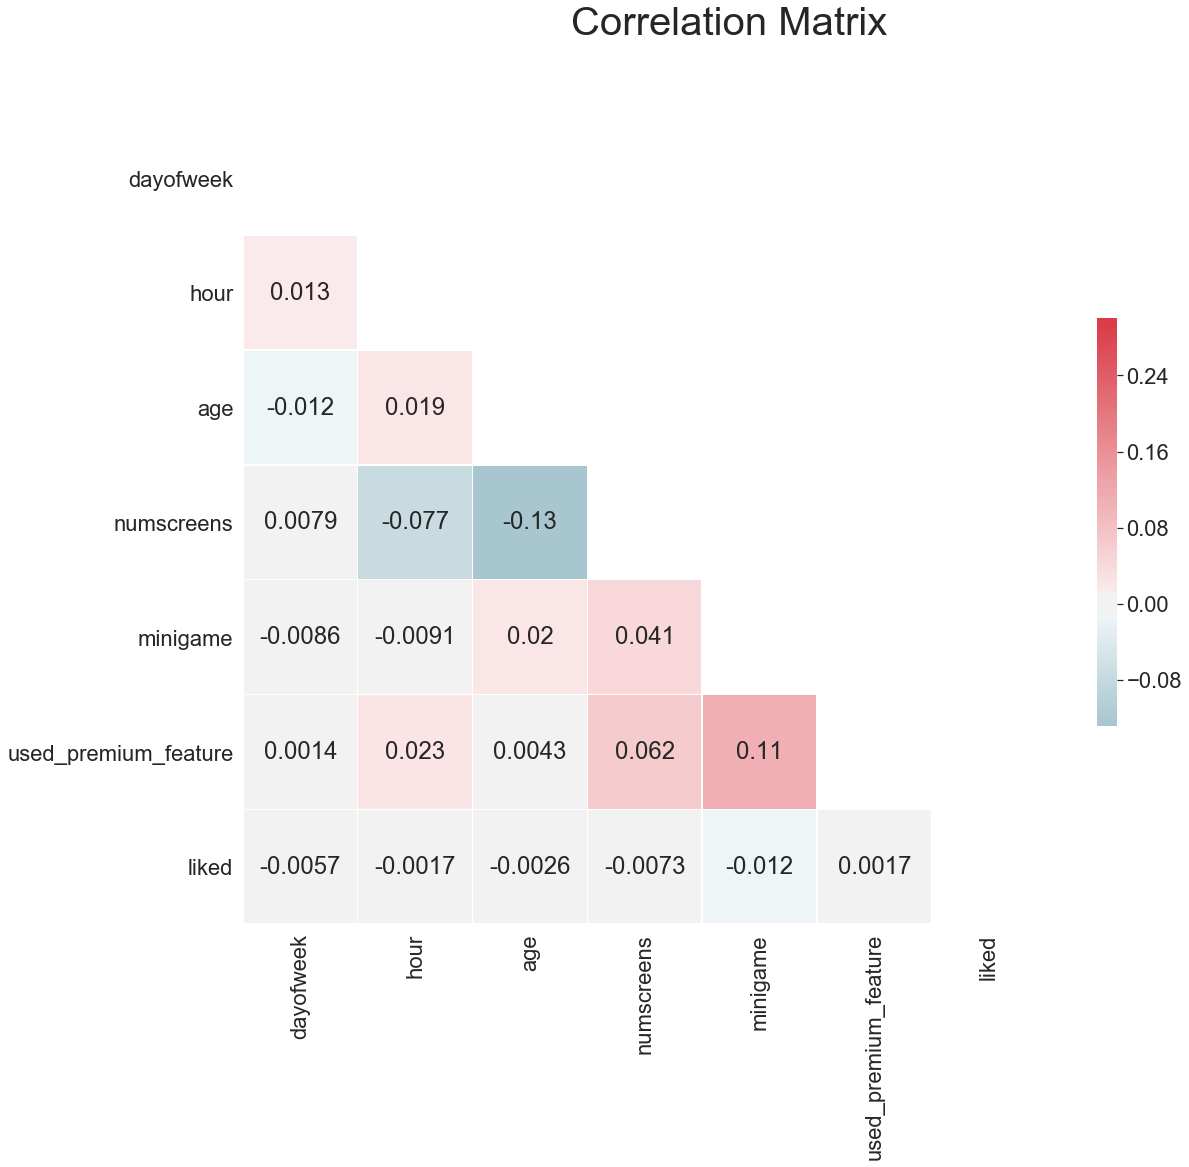

In [13]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = customerappn.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Engineering

### Formatting Date Columns

In [14]:
customerapp.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
#Change the data types of the date 

In [16]:
customerapp['first_open'] = [parser.parse(row_date) for row_date in customerapp['first_open']]

In [17]:
customerapp["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in customerapp["enrolled_date"]]

In [18]:
customerapp.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [19]:
#Calculate the customer response time to purchase the app

In [20]:
customerapp['responsetime'] = (customerapp.enrolled_date-customerapp.first_open).astype('timedelta64[h]')

Visualize the responsetime on histogram

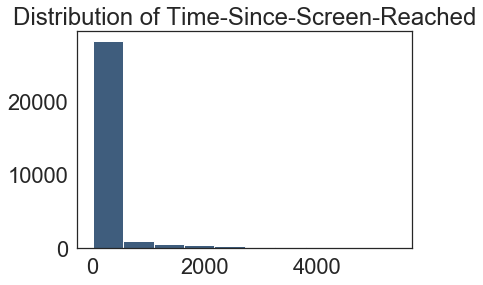

In [21]:
response_hist = plt.hist(customerapp['responsetime'].dropna(), color='#3F5D7D', )
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [22]:
customerapp.loc[customerapp.responsetime > 48, 'enrolled'] = 0



In [23]:
customerapp =customerapp.drop(columns=['enrolled_date', 'responsetime', 'first_open'])

## Formatting the Screen_List Field

Load top_screen dataset

In [24]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values


In [25]:
# Mapping Screens to Fields
customerapp['screen_list'] = customerapp.screen_list.astype(str) + ','

In [26]:
#Create a column for each top_screen feature in screen_list, which return a boelean
for sc in top_screens:
    customerapp[sc] = customerapp.screen_list.str.contains(sc).astype(int)
    customerapp['screen_list'] = customerapp.screen_list.str.replace(sc+",", "")


In [27]:
customerapp.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [29]:
#Create a value column for other screens apart from top_screen in the Screen_list
customerapp['other'] = customerapp.screen_list.str.count(",")

In [30]:
customerapp.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10


In [31]:
#Drop the screen_list column
customerapp = customerapp.drop(columns=['screen_list'])

### Create Funnels

Create funnels, which are a group of screens that belongs to the same set. There are many screens that are correlated to each other, we don't want correlated screens for the model. In order to get rid of the correlation, and still keep the values, we are going to group all the screens into one funnel.

First create a list of all the screens that belongs to the funnel

In [32]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

A new Column for the count of all the savings screen found in the Screen_list

In [33]:
customerapp["Savingscount"] = customerapp[savings_screens].sum(axis = 1)
#THis sums all the screens with savings the return the value in the new column, Savingscount

In [34]:
#Drop Savings in the DF, by dropping savings_screen
customerapp = customerapp.drop(columns=savings_screens)

Carry the above Feature Engineering for other funnels

In [35]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]

In [36]:
customerapp["cmcount"] = customerapp[cm_screens].sum(axis = 1)

In [37]:
customerapp = customerapp.drop(columns= cm_screens)

In [38]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]

In [39]:
customerapp["cccount"] = customerapp[cc_screens].sum(axis = 1)

In [40]:
customerapp = customerapp.drop(columns= cc_screens)

In [41]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]

In [42]:
customerapp["loancount"] = customerapp[loan_screens].sum(axis= 1)

In [43]:
customerapp = customerapp.drop(columns= loan_screens)

Feature Engineering completed, lets save our DF into csv, for modelling

In [44]:
customerapp.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'Savingscount', 'cmcount', 'cccount', 'loancount'],
      dtype='object')

In [45]:
customerapp.to_csv('final_dataset.csv', index = False)

## Data Preprocessing 

In [46]:
customerappp = pd.read_csv('final_dataset.csv')

Create the response column


In [47]:
response = customerappp["enrolled"]

In [48]:
#Drop the enrolled column

In [49]:
customerappp = customerappp.drop(columns=["enrolled"])

In [50]:
customerappp.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'Savingscount', 'cmcount', 'cccount', 'loancount'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(customerappp, response,
                                                   test_size = 0.2, random_state= 0)

Create Train and Test identifer(User)

In [53]:
train_identifier = X_train['user']

In [54]:
test_identifier = X_test['user']

In [55]:
X_train = X_train.drop(columns=['user'])

In [56]:
X_test = X_test.drop(columns=['user'])

## Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Adesiji\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Modelling

In [59]:
from sklearn.linear_model import LogisticRegression 

In [60]:
 model = LogisticRegression(random_state = 0, penalty = 'l1')

In [61]:
model.fit(X_train, y_train)

C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [64]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7681

In [65]:
f1_score(y_test, y_pred)

0.7659703300030276

In [66]:
#tp /(tp +fP)
precision_score(y_test, y_pred)

0.7618952017667135

In [67]:
#tp/(tp + fn)
recall_score(y_test, y_pred)

0.7700892857142857

Plot Confusion Matrix

Test Data Accuracy: 0.7681


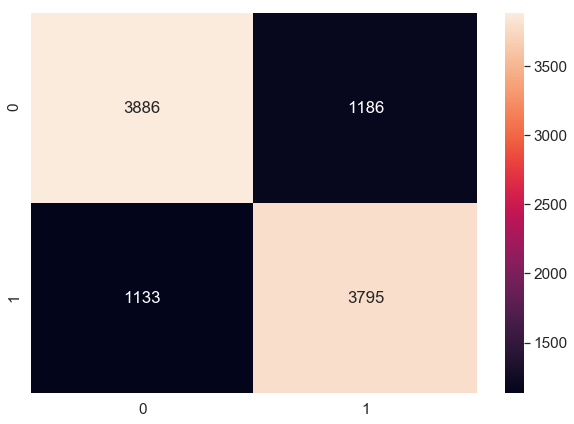

In [68]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


## K-fold Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(" Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adesiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

 Accuracy: 0.767 (+/- 0.010)


In [70]:
customer_result= pd.concat([y_test, test_identifier], axis = 1).dropna()

In [74]:
customer_result.head()

,enrolled,user
11841,1,239786
19602,1,279644
45519,0,98290
25747,1,170150
42642,1,237568


In [75]:
customer_result['predicted_results'] = y_pred

In [76]:
customer_result[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


In [79]:
customer_result.to_csv('final_result.csv', index= False)